In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#visualizando o dataset do Netflix
netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#visualizando a quantidade de shows
netflix.shape

(6234, 12)

In [5]:
#tipos de programação
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
#proporção entre filmes e programas de TV
netflix['type'].value_counts(normalize=True)*100


Movie      68.415143
TV Show    31.584857
Name: type, dtype: float64

In [9]:
#quais as listagens possíveis
netflix['listed_in'].nunique()

461

In [11]:
#criando uma cópia pra fazer manipulação dos dados
dados = netflix.copy()

In [13]:
#transformando o listed_in em uma lista
dados['listed']= dados['listed_in'].str.split(',')

In [14]:
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[Children & Family Movies, Comedies]"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,[Stand-Up Comedy]
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",[Kids' TV]
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,[Kids' TV]
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,[Comedies]


In [17]:
#explodindo a coluna listed em várias linhas
dados_por_categoria = dados.explode('listed').reset_index(drop=True)

In [18]:
dados_por_categoria.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Children & Family Movies
1,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Comedies
2,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy
3,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Kids' TV
4,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV


In [19]:
#antes
dados_por_categoria['listed_in'].nunique()

461

In [21]:
#depois
dados_por_categoria['listed'].nunique()

72

In [22]:
#antes
dados.shape

(6234, 13)

In [23]:
#depois
dados_por_categoria.shape

(13670, 13)

In [25]:
dados_por_categoria['listed'].value_counts()

 International Movies        1842
Dramas                       1077
Comedies                      803
Documentaries                 644
Action & Adventure            597
                             ... 
 Classic & Cult TV              5
Romantic Movies                 2
Spanish-Language TV Shows       1
Sports Movies                   1
TV Sci-Fi & Fantasy             1
Name: listed, Length: 72, dtype: int64

In [31]:
#tirando espaços em branco antes e depois das palavras
dados_por_categoria['listed'] = dados_por_categoria['listed'].str.strip()

In [30]:
dados_por_categoria.listed.nunique()

42

In [32]:
#visualizando as categorias
dados_por_categoria.listed.unique()

array(['Children & Family Movies', 'Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Crime TV Shows', 'International TV Shows',
       'Spanish-Language TV Shows', 'International Movies',
       'Sci-Fi & Fantasy', 'Thrillers', 'Docuseries',
       'Science & Nature TV', 'Action & Adventure', 'Dramas',
       'Cult Movies', 'Independent Movies', 'Romantic Movies',
       'Documentaries', 'Horror Movies', 'Romantic TV Shows',
       'TV Comedies', 'TV Dramas', 'TV Thrillers', 'TV Mysteries',
       'British TV Shows', 'Music & Musicals', 'Reality TV',
       'TV Action & Adventure', 'Anime Features', 'Teen TV Shows',
       'Faith & Spirituality', 'Korean TV Shows', 'Anime Series',
       'LGBTQ Movies', 'TV Horror', 'Movies',
       'Stand-Up Comedy & Talk Shows', 'TV Sci-Fi & Fantasy',
       'Classic Movies', 'Sports Movies', 'TV Shows', 'Classic & Cult TV'],
      dtype=object)

In [33]:
dados_por_categoria.listed.value_counts()

International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                    668
TV Dramas                        599
Action & Adventure               597
Independent Movies               552
TV Comedies                      436
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   363
Kids' TV                         328
Stand-Up Comedy                  281
Docuseries                       279
Romantic TV Shows                278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 210
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Anime Series                     117
Spanish-Language TV Shows        117
C

In [34]:
#separando entre filmes e TV
tv = dados_por_categoria[dados_por_categoria.type == 'TV Show']
filmes = dados_por_categoria[dados_por_categoria.type == 'Movie']

In [35]:
#categorias de programas de TV
tv.listed.nunique()

22

In [36]:
tv.listed.value_counts()

International TV Shows          1001
TV Dramas                        599
TV Comedies                      436
Crime TV Shows                   363
Kids' TV                         328
Docuseries                       279
Romantic TV Shows                278
British TV Shows                 210
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Spanish-Language TV Shows        117
Anime Series                     117
TV Mysteries                      69
TV Sci-Fi & Fantasy               68
Science & Nature TV               67
TV Horror                         54
TV Thrillers                      44
Teen TV Shows                     44
Stand-Up Comedy & Talk Shows      42
Classic & Cult TV                 24
TV Shows                          10
Name: listed, dtype: int64

In [41]:
#localizando shows categorizados somente como Internacionais
netflix.loc[netflix['listed_in'] == 'International Movies']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
533,81121023,Movie,My Next Guest with David Letterman and Shah Ru...,Michael Steed,"Shah Rukh Khan, David Letterman",NaN,"October 25, 2019",2019,TV-PG,61 min,International Movies,"""King of Bollywood"" Shah Rukh Khan opens up ab..."
2568,80219802,Movie,Derren Brown: Miracle,NaN,Derren Brown,United Kingdom,"June 22, 2018",2018,TV-MA,74 min,International Movies,Illusionist Derren Brown reinvents the concept...


In [51]:
dados['country'].nunique()

554

In [44]:
#transformando a os países de string para lista
dados['country_unique'] = dados['country'].str.split(',')

In [45]:
#separando as informações por país
dados_por_pais = dados.explode('country_unique').reset_index(drop=True)

In [47]:
#vendo com quantas linhas ficou o dataset
dados_por_pais.shape

(7658, 14)

In [48]:
dados_por_pais['country_unique'] = dados_por_pais['country_unique'].str.strip()

In [49]:
dados_por_pais.country.nunique()

554

In [50]:
dados_por_pais['country_unique'].nunique()

111

In [53]:
print(dados_por_pais['country_unique'].unique())

['United States' 'India' 'South Korea' 'China' 'United Kingdom' 'Spain'
 'Bulgaria' 'Canada' 'Chile' 'Denmark' 'Sweden' nan 'Netherlands'
 'Belgium' 'France' 'Uruguay' '' 'Thailand' 'Pakistan' 'Turkey' 'Brazil'
 'Italy' 'Indonesia' 'Ireland' 'Hong Kong' 'Morocco' 'Mexico' 'Vietnam'
 'Argentina' 'Nigeria' 'Japan' 'Germany' 'Greece' 'Norway' 'Switzerland'
 'United Arab Emirates' 'Lebanon' 'Cambodia' 'Russia' 'Poland' 'Israel'
 'Australia' 'Portugal' 'Egypt' 'Taiwan' 'Austria' 'Czech Republic'
 'Senegal' 'Soviet Union' 'Peru' 'Ukraine' 'Malaysia' 'South Africa'
 'Nepal' 'Philippines' 'Serbia' 'Colombia' 'Singapore' 'Luxembourg'
 'West Germany' 'Cayman Islands' 'New Zealand' 'Venezuela' 'Jordan'
 'Saudi Arabia' 'Iceland' 'Malta' 'Qatar' 'Iran' 'Finland' 'Iraq'
 'Liechtenstein' 'Albania' 'Slovakia' 'Samoa' 'Ghana' 'Botswana' 'Hungary'
 'Guatemala' 'Malawi' 'Paraguay' 'Somalia' 'Kenya' 'Sudan' 'Sri Lanka'
 'Dominican Republic' 'Panama' 'Romania' 'Latvia' 'Uganda' 'Slovenia'
 'Croatia' 'Monte

In [55]:
#testando o str.split com o parâmetro expand=True
dados[['duration','duration_type']] = dados['duration'].str.split(' ', expand=True)

In [56]:
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed,country_unique,duration_type
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[Children & Family Movies, Comedies]","[United States, India, South Korea, China]",min
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,[Stand-Up Comedy],[United Kingdom],min
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",[Kids' TV],[United States],Season
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,[Kids' TV],[United States],Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,[Comedies],[United States],min


In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         6234 non-null   int64 
 1   type            6234 non-null   object
 2   title           6234 non-null   object
 3   director        4265 non-null   object
 4   cast            5664 non-null   object
 5   country         5758 non-null   object
 6   date_added      6223 non-null   object
 7   release_year    6234 non-null   int64 
 8   rating          6224 non-null   object
 9   duration        6234 non-null   object
 10  listed_in       6234 non-null   object
 11  description     6234 non-null   object
 12  listed          6234 non-null   object
 13  country_unique  5758 non-null   object
 14  duration_type   6234 non-null   object
dtypes: int64(2), object(13)
memory usage: 730.7+ KB


In [58]:
#usando para nossos datasets de TV e Filmes
tv[['duration','duration_type']] = tv['duration'].str.split(' ', expand=True)
filmes[['duration','duration_type']] = filmes['duration'].str.split(' ', expand=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [59]:
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed,duration_type
3,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",Kids' TV,Season
4,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV,Season
6,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,Crime TV Shows,Season
7,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,International TV Shows,Season
8,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,Spanish-Language TV Shows,Season


In [60]:
tv.duration_type.unique()

array(['Season', 'Seasons'], dtype=object)

In [61]:
filmes.duration_type.unique()

array(['min'], dtype=object)

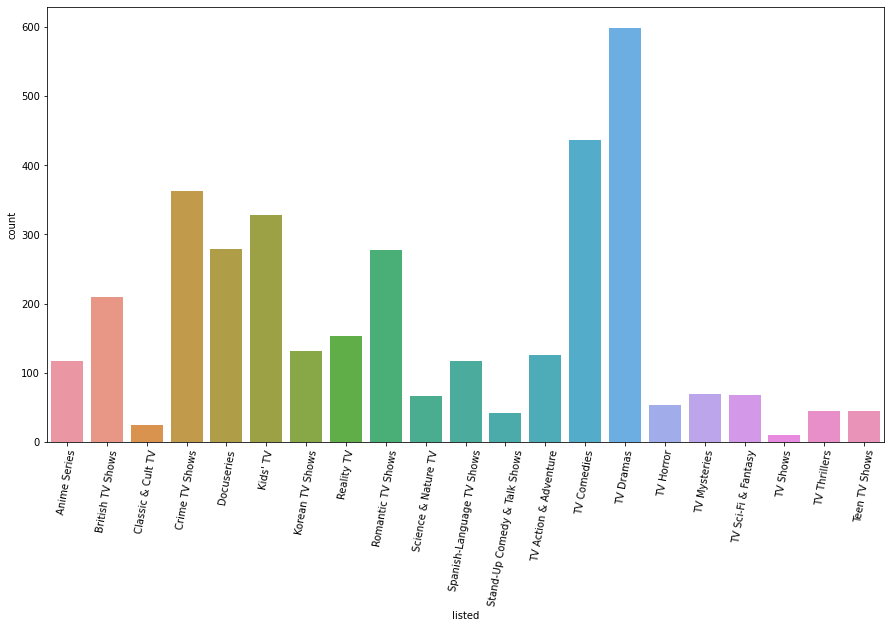

In [76]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x=tv[tv['listed']!='International TV Shows']['listed'].sort_values())
plt.xticks(rotation=80);

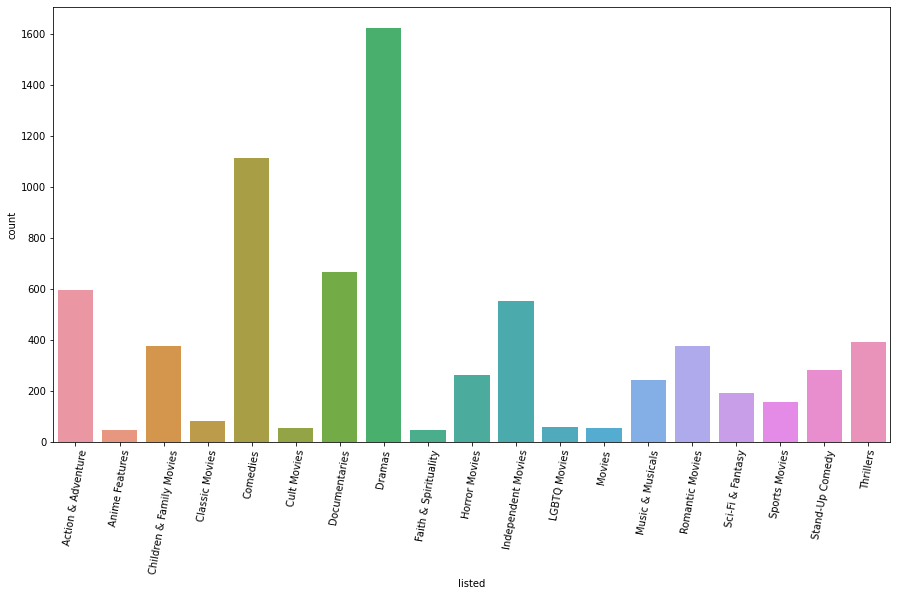

In [77]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x=filmes[filmes['listed']!='International Movies']['listed'].sort_values())
plt.xticks(rotation=80);

In [80]:
#transformando a coluna  duration em numérica
dados.convert_dtypes()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed,country_unique,duration_type
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[Children & Family Movies, Comedies]","[United States, India, South Korea, China]",min
1,80117401,Movie,Jandino: Whatever it Takes,<NA>,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,[Stand-Up Comedy],[United Kingdom],min
2,70234439,TV Show,Transformers Prime,<NA>,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",[Kids' TV],[United States],Season
3,80058654,TV Show,Transformers: Robots in Disguise,<NA>,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,[Kids' TV],[United States],Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,[Comedies],[United States],min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,<NA>,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,<NA>,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...","[TV Action & Adventure, TV Comedies, TV Sci-...",[United States],Seasons
6230,70286564,TV Show,Maron,<NA>,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,<NA>,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",[TV Comedies],[United States],Seasons
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,<NA>,<NA>,<NA>,<NA>,2016,<NA>,60,Movies,Nursery rhymes and original music for children...,[Movies],NaN,min
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,<NA>,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,<NA>,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...","[British TV Shows, TV Comedies, TV Dramas]",[United Kingdom],Seasons


In [82]:
dados['duration'] = dados['duration'].astype('int')

In [83]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         6234 non-null   int64 
 1   type            6234 non-null   object
 2   title           6234 non-null   object
 3   director        4265 non-null   object
 4   cast            5664 non-null   object
 5   country         5758 non-null   object
 6   date_added      6223 non-null   object
 7   release_year    6234 non-null   int64 
 8   rating          6224 non-null   object
 9   duration        6234 non-null   int64 
 10  listed_in       6234 non-null   object
 11  description     6234 non-null   object
 12  listed          6234 non-null   object
 13  country_unique  5758 non-null   object
 14  duration_type   6234 non-null   object
dtypes: int64(3), object(12)
memory usage: 730.7+ KB


In [88]:
#duração total de filmes
tempo_total = dados[dados['type'] == 'Movie']['duration'].sum()
print(f'o tempo total de filmes no Netflix em 2018 é de {(tempo_total/60).round(2)} horas')
print(f'Para assistir todos os filmes uma pessoa levaria {((tempo_total/60)/24).round(2)} dias ininterruptos')

o tempo total de filmes no Netflix em 2018 é de 7044.42 horas
Para assistir todos os filmes uma pessoa levaria 293.52 dias ininterruptos


In [90]:
#quantas temporadas de séries que o catálogo da Netflix tem?
temporadas_total = dados[dados['type'] == 'TV Show']['duration'].sum()
print(f'O catálogo da Netflix em 2018 possui {temporadas_total} temporadas de séries')

O catálogo da Netflix em 2018 possui 3504 temporadas de séries
